# Network Algorithms
## PW1 - Working with Python and NetworkX
## Cities and Airports
### Author - Kamal Ahmadov, CS-020, kamal.ahmadov1@ufaz.az

## PW1

In [3]:
#necessary imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Read files

In [11]:
cities = pd.read_csv("cities_in_az.csv")
cities

,Origin,Destination,Hours
0,Alat,Baku,1.08
1,Baku,Alat,1.13
2,Alat,Shirvan,0.83
3,Shirvan,Alat,0.80
4,Imishli,Shirvan,1.42
5,Shirvan,Imishli,1.38
6,Shamakhi,Imishli,1.83
7,Imishli,Shamakhi,1.87
8,Shamakhi,Baku,1.67
9,Baku,Shamakhi,1.77


In [10]:
airports = pd.read_csv("airports.csv")
airports

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2008,1,18,5,1206.0,1200,1713.0,1705,172.0,LAX,HOU,1390
49996,2008,1,18,5,807.0,810,1306.0,1315,170.0,LAX,HOU,1390
49997,2008,1,18,5,1834.0,1815,1933.0,1920,45.0,LAX,LAS,236
49998,2008,1,18,5,725.0,725,821.0,825,42.0,LAX,LAS,236


### Short description of files

In [12]:
print(cities.head(),end="\n\n")
print(cities.columns)

    Origin Destination  Hours
0     Alat        Baku   1.08
1     Baku        Alat   1.13
2     Alat     Shirvan   0.83
3  Shirvan        Alat   0.80
4  Imishli     Shirvan   1.42

Index(['Origin', 'Destination', 'Hours'], dtype='object')


In [15]:
print(airports.head(),end="\n\n")
print(airports.columns)

   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
3  2008      1           3          4    926.0         930   1054.0   
4  2008      1           3          4   1829.0        1755   1959.0   

   CRSArrTime  AirTime Origin Dest  Distance  
0        2225    116.0    IAD  TPA       810  
1        1000    113.0    IAD  TPA       810  
2         750     76.0    IND  BWI       515  
3        1100     78.0    IND  BWI       515  
4        1925     77.0    IND  BWI       515  

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'AirTime', 'Origin', 'Dest', 'Distance'],
      dtype='object')


### Build and show graphs

In [17]:
cities_graph = nx.from_pandas_edgelist(cities, source='Origin', target='Destination', edge_attr=True, create_using=nx.DiGraph)

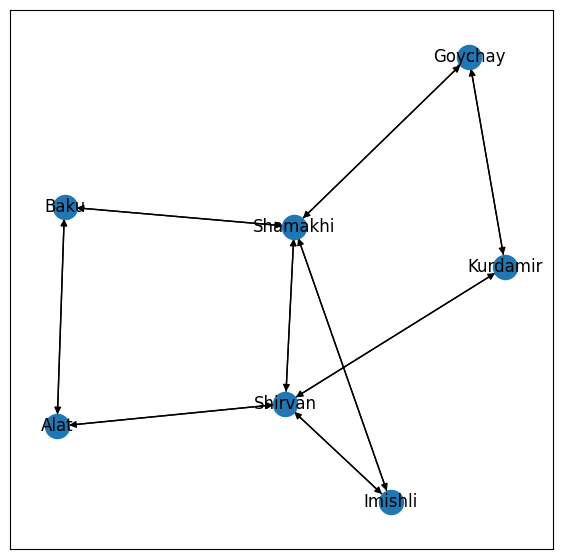

In [18]:
plt.figure(figsize=(7, 7))
nx.draw_networkx(cities_graph, with_labels=True)
plt.show()

In [ ]:
airports_graph = nx.from_pandas_edgelist(airports, source='Origin', target='Dest', edge_attr=True, create_using=nx.DiGraph)

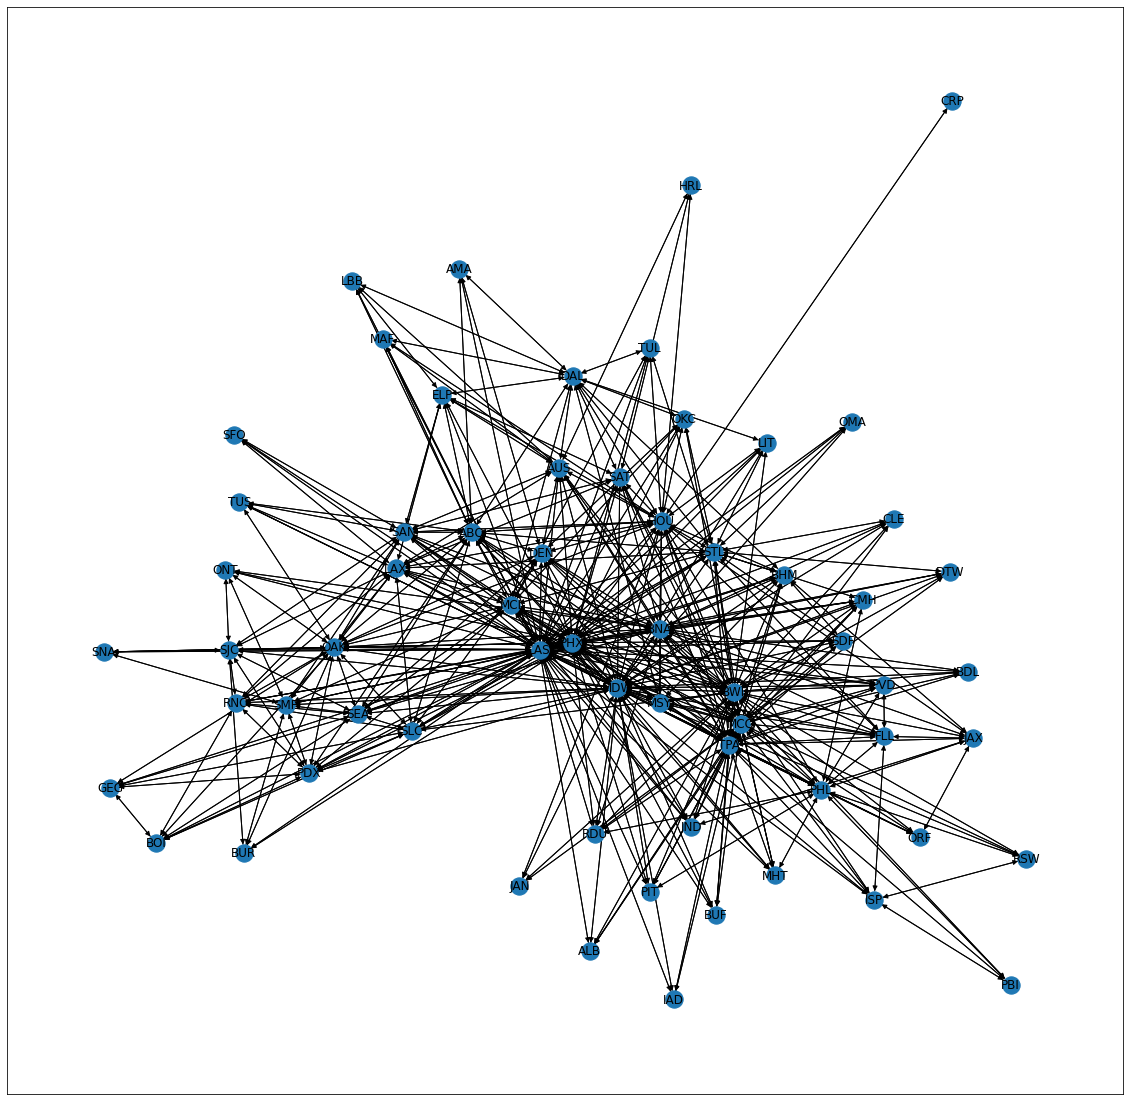

In [ ]:
plt.figure(figsize=(20,20))
nx.draw_networkx(airports_graph, with_labels=True)
# plt.show()

In [ ]:
def attirbute_for_nodes(G, attribute, default_value):
  for g in G.nodes.keys():
    G.nodes[g][attribute] = default_value

### My Path Finding Function
The code implements a depth-first search (DFS) algorithm for pathfinding in a graph. 

In [ ]:
def my_dfs(graph: nx.Graph, origin, dest):
  walk = [origin]
  graph.nodes[origin]['Visited'] = True

  if origin == dest:
    return walk
  
  for neighbor in graph.neighbors(origin):
    if graph.nodes[neighbor]['Visited'] != True:
      _walk = my_dfs(graph, neighbor, dest)
      if _walk is None: 
        continue
      walk.extend(_walk)
      break
  else:
    return None
  return walk

attirbute_for_nodes(cities_graph, 'Visited', False)
print(my_dfs(cities_graph, 'Alat', 'Imishli'))

['Alat', 'Baku', 'Shamakhi', 'Imishli']


In [ ]:
def get_walk_length(graph: nx.Graph, walk, attribute):
  length = 0
  for i in range(len(walk) - 1):
    length += graph.edges[(walk[i], walk[i+1])][attribute]
  return length

In [ ]:
print(cities_graph.nodes)

['Alat', 'Baku', 'Shirvan', 'Imishli', 'Shamakhi', 'Kurdamir', 'Goychay']


In [ ]:
attirbute_for_nodes(cities_graph, 'Visited', False)
source = 'Goychay'
target = 'Imishli'

walk = my_dfs(cities_graph, source, target)
length = get_walk_length(cities_graph, walk, 'Hours')

print(f"{walk=} {length=}")
shortest_walk = nx.shortest_path(cities_graph, source=source, target=target, weight='Hours')
shortest_length = get_walk_length(cities_graph, shortest_walk, 'Hours')
print(f"{shortest_walk=} {shortest_length=}")

walk=['Goychay', 'Kurdamir', 'Shirvan', 'Alat', 'Baku', 'Shamakhi', 'Imishli'] length=7.65
shortest_walk=['Goychay', 'Shamakhi', 'Imishli'] shortest_length=3.25


In [ ]:
airports_nodes = list(airports_graph.nodes)
airports_nodes.sort()
print(airports_nodes)

['ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BHM', 'BNA', 'BOI', 'BUF', 'BUR', 'BWI', 'CLE', 'CMH', 'CRP', 'DAL', 'DEN', 'DTW', 'ELP', 'FLL', 'GEG', 'HOU', 'HRL', 'IAD', 'IND', 'ISP', 'JAN', 'JAX', 'LAS', 'LAX', 'LBB', 'LIT', 'MAF', 'MCI', 'MCO', 'MDW', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PVD', 'RDU', 'RNO', 'RSW', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TPA', 'TUL', 'TUS']


In [ ]:
attirbute_for_nodes(airports_graph, 'Visited', False)
source = 'ABQ'
target = 'BDL'

walk = my_dfs(airports_graph, source, target)
distance = get_walk_length(airports_graph, walk, 'Distance')
air_time = get_walk_length(airports_graph, walk, 'AirTime')
print(f"{walk=} {distance=} {air_time=}")

shortest_walk_by_distance = nx.shortest_path(airports_graph, source=source, target=target, weight='Distance')
shortest_distance = get_walk_length(airports_graph, shortest_walk_by_distance, 'Distance')
shortest_air_time = get_walk_length(airports_graph, shortest_walk_by_distance, 'AirTime')
print(f"{shortest_walk_by_distance=} {shortest_distance=} {shortest_air_time=}")

shortest_walk_by_airtime = nx.shortest_path(airports_graph, source=source, target=target, weight='AirTime')
shortest_distance = get_walk_length(airports_graph, shortest_walk_by_airtime, 'Distance')
shortest_air_time = get_walk_length(airports_graph, shortest_walk_by_airtime, 'AirTime')
print(f"{shortest_walk_by_airtime=} {shortest_distance=} {shortest_air_time=}")

walk=['ABQ', 'AMA', 'DAL', 'AUS', 'BNA', 'BDL'] distance=2398 air_time=318.0
shortest_walk_by_distance=['ABQ', 'MDW', 'BDL'] shortest_distance=1898 shortest_air_time=224.0
shortest_walk_by_airtime=['ABQ', 'BWI', 'BDL'] shortest_distance=1953 shortest_air_time=223.0
